In [33]:
! pip install networkx graphviz sounddevice requests


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [296]:
import requests
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from numpy import random
from sklearn.model_selection import train_test_split
from collections import defaultdict
import re
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline
import networkx as nx
import math
import pandas as pd
import graphviz
import networkx as nx
import numpy as np
import matplotlib
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from networkx.drawing.nx_agraph import graphviz_layout
import sounddevice as sd

# Punto 1

In [246]:
df = pd.read_excel("tabla.xlsx")
df

,ingresos,estrato,credito
0,1,2,0
1,5,2,0
2,1,4,1
3,6,0,0
4,8,5,1
5,4,0,0
6,3,5,1
7,6,2,0
8,3,5,1
9,3,2,0


In [247]:
x=df[["ingresos","estrato"]]
y=df[["credito"]]
classifier = tree.DecisionTreeClassifier(random_state=0,criterion='entropy')
classifier.fit(x, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[Text(0.6, 0.8333333333333334, 'estrato <= 3.5\nentropy = 1.0\nsamples = 30\nvalue = [15, 15]\nclass = Credito1'),
 Text(0.4, 0.5, 'ingresos <= 7.5\nentropy = 0.742\nsamples = 19\nvalue = [15, 4]\nclass = Credito1'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]\nclass = Credito1'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Credito0'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = Credito0')]

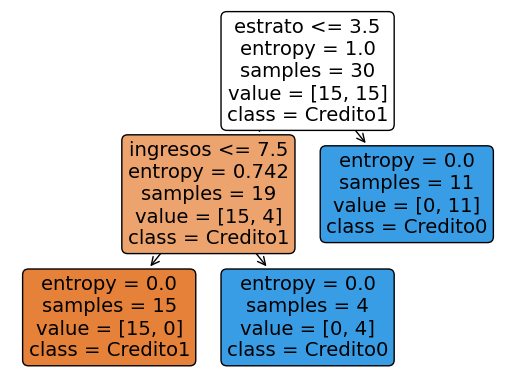

In [248]:

treeFig = tree.plot_tree(classifier,
                   feature_names=["ingresos","estrato"],
                   class_names=["Credito1","Credito0"],
                   rounded=True,
                   filled=True)
treeFig

## Conclusión
No son completamente iguales ya que por ejemplo el skalearn da en el primer nivel un valor del estrato de 3.5, esto a mano no se vería ya que solo tenemos categorías enteras del 0 al 5. Sin embargo, sí queda muy parecido ya que partiendo del análisis de las entropías, la variable más relevante es el estrato y luego están los ingresos.


# Punto 2

In [256]:
def y_predict(a, b, c, d, x):
    return a * np.sin(b * x + c) + d

def gradientDescent(x, y, nEpoch):
    n = len(x)
    rsl = []
    a = random.random()
    b = random.random()
    c = random.random()
    d = 0
    
    
    for i in range(nEpoch):
        a_gradiente = 0
        b_gradiente = 0
        c_gradiente = 0
        d_gradiente = 0
        e = 0

        for _ in range(500):
            ix = int(random.uniform(0, n))
            y_pred = y_predict(a, b, c, d, x[ix])
            error = y[ix] - y_pred

            e += error**2
            a_gradiente += 2 * error * -1.0*np.sin(b * x[ix] + c)
            b_gradiente += 2 * error * -1.0*a * np.cos(b * x[ix] + c) * x[ix]
            c_gradiente += 2 * error * -1.0*a * np.cos(b * x[ix] + c)
            d_gradiente += 2 * error

        a -= 0.01 * a_gradiente / 500
        b -= 0.01 * b_gradiente / 500
        c -= 0.01 * c_gradiente / 500

        e /= 500
        rsl.append([a, b, c, e])

    return rsl, a, b, c

def printResults(y, a, b, c):
    plt.ylabel("y")
    plt.plot(y)
    ix = -1
    plt.plot([ y_predict(a,b,c,0,xi) for xi in x[:ix]])

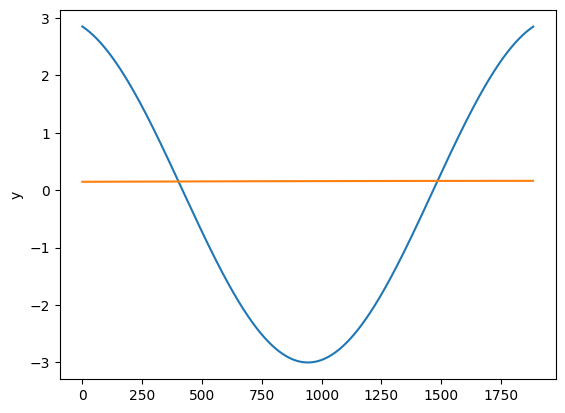

In [257]:
df = pd.read_csv("senal.csv")
x = df["x"].values
y= df["y"].values

results, a,b,c = gradientDescent(x,y,10)
printResults(y,a,b,c)

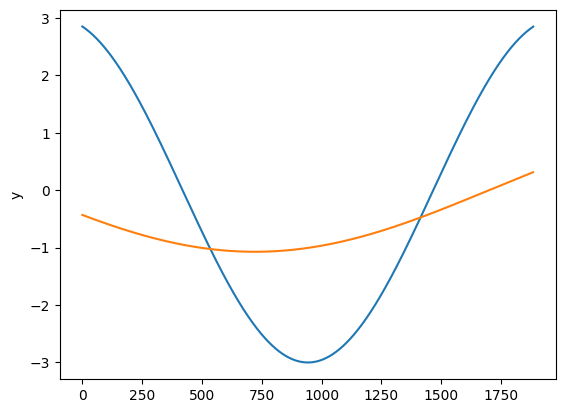

In [258]:
results, a,b,c = gradientDescent(x,y,400)
printResults(y,a,b,c)

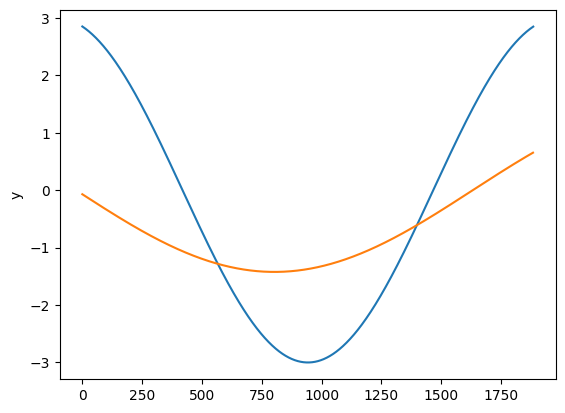

In [259]:
results, a,b,c = gradientDescent(x,y,1000)
printResults(y,a,b,c)

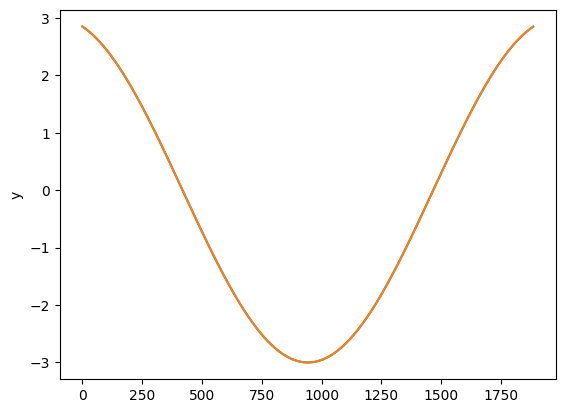

In [260]:
results, a,b,c = gradientDescent(x,y,2000)
printResults(y,a,b,c)

In [261]:
long_s = [ y_predict(a,b,c,0,xi) for xi in np.arange(0 , 20*math.pi, 0.001).astype(np.float32)]
sd.play(long_s)

# Punto 3

In [262]:
def quitAccentsUnnecesarySpacesAndLower(text):
    text = text.lower()
    text = re.sub('[áäâà]', 'a', text)
    text = re.sub('[éëêè]', 'e', text)
    text = re.sub('[íïîì]', 'i', text)
    text = re.sub('[óöôò]', 'o', text)
    text = re.sub('[úüûù]', 'u', text)
    text = re.sub('[^a-z]', ' ', text)  
    text = re.sub('\s+', ' ', text)
    return text

In [263]:
def getWords(text, stop_words=[]):
    words = text.split()
    words = filter(lambda x: False if len(x) < 2 or x in stop_words else True, words)
    return words

In [264]:
def addWordsToDictionary(text, dictionary, stop_words = []):
    words = getWords(text, stop_words)
    for word in words:
        dictionary[word] += 1
    return dictionary

In [265]:
def print_tree(cls, features):
    tree.plot_tree(cls,
                   fontsize=11,
                   class_names= features,
                   rounded=True,
                   filled=True)

In [290]:
def print_confusion_matrix(x_train, y_train, clf):
    y_predict = clf.predict(x_train)
    cm = confusion_matrix(y_train, y_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

In [267]:
res = requests.get("https://www.datos.gov.co/resource/v98q-23dp.json?$query=SELECT%0A%20%20%60titulo%60%2C%0A%20%20%60descripcion%60%2C%0A%20%20%60url_lista_de_reproduccion%60%2C%0A%20%20%60plataforma%60")
if res.status_code == 200:
    df = pd.DataFrame(res.json())

In [268]:
titles = df["titulo"].apply(lambda x: quitAccentsUnnecesarySpacesAndLower(x)).tolist()

dictionary = defaultdict(int)
for title in titles:
    dictionary=addWordsToDictionary(title, dictionary)


In [269]:
print("Hay", sum(dictionary.values()), "palabras en el dataset")

Hay 6819 palabras en el dataset


In [270]:
matrix = []
for title in titles:
    words = title.split()
    row = []
    for wordDict in dictionary:
        if wordDict in title:
            row.append(words.count(wordDict))
        else:
            row.append(0)
    matrix.append(row)

columns = [word for word in dictionary]
matrix = pd.DataFrame(matrix,columns=columns, index=['Title'+ str(i) for i in range(len(titles))])
            

In [271]:
matrix

,urbilogo,bogota,dominguera,historias,en,bici,sibate,pedalea,su,pasado,today,in,replay,de,febrero,documentales,camilo,el,cura,guerrillero,hoy,martes,mayo,se,alparapensar,cine,nos,vemos,cuchillo,palo,renate,costa,los,pepa,clip,mascara,carnaval,saludo,miguel,angel,lopez,todo,lo,que,televidente,oscar,augusto,ferreira,nairo,quintana,ya,esta,viajando,francia,sillon,hip,hop,concurso,nacional,bandas,paipa,boyaca,desfile,completo,tour,con,sub,originalidad,pedaleopor,ariel,molina,envia,un,escarabajos,frank,ramirez,icono,la,tv,colombia,preguntas,frecuentes,operador,video,puesto,gente,universal,gran,escuesta,del,colombiano,jaime,echavarria,acceso,directo,glosario,horario,familiar,mariana,pajon,llega,juegos,nacionales,jueves,viernes,noviembre,paranacionales,juan,pablo,castellanos,edificio,master,eduardo,coutinho,argentinos,toman,metro,rio,para,ver,magazin,retromoda,nuestros,deportistas,paulo,villar,sicario,jose,ramon,novoa,televidentes,francisco,casas,dbc,intro,cap,habito,salvando,planeta,palabra,mentiras,piadosas,capitulo,oro,paz,al,clara,joya,vimos,seis,programas,mas,innovadores,edgar,melo,sabado,julio,mes,literatura,artpoetica,abril,junio,reso,animales,largo,nett,nuestras,escuelas,transforman,territorios,lunes,convocatoria,sobre,derechos,humanos,las,mujeres,violencia,basada,genero,anonimas,extraordinarias,claudia,delgado,estreno,temporada,puerto,papel,maite,hontele,ft,freaky,colectivo,jame,asi,sandra,ria,horribles,serie,pm,garzon,especial,ganador,india,catalina,mejor,produccion,periodistica,mi,josefina,guante,parlante,carnavalito,cirugia,estetica,mpg,es,chevere,estar,equipo,aislados,fotografia,nace,una,orquesta,entrevista,manuela,vasquez,aldeportes,paseos,retro,reel,alcolombia,colom,bio,basuras,respuestas,vivir,juntos,familia,argentina,avila,padres,hijos,nueva,venecia,situacion,pesca,television,fue,...,vanidad,camacho,vivaldi,cantando,brasilia,yo,soy,buscas,infografia,adultos,mpeg,espejo,ritos,sus,impresiones,dagoberto,relajate,hay,mejores,formas,mostrar,pensar,pico,cha,gu,eva,infantiles,fin,raul,amortegui,telenovelas,perfil,oswaldo,aferra,liderato,mirar,tele,sismografo,casero,duberney,galvis,lotto,beliso,mu,oz,perdita,durango,educativa,territorio,bandola,marcador,gaviria,giro,paseo,debate,foros,postconflicto,tecnologias,jonathan,devia,jesus,chucho,bombillas,electricas,homejaje,sindy,ortiz,petrona,dan,opinion,anton,tiruriru,villancicos,tipicos,ltimo,boyita,solomonoff,cifuentes,biopics,nepentes,violentos,mecanico,trek,segafredo,rasos,conversatorio,rompiendo,fronteras,john,grandes,misterios,universo,morgan,freeman,sabados,domingos,ximena,liliana,familiaridad,us,open,guia,practica,criollo,payaso,deportivo,psy,rivas,presentador,fiel,vainilla,clases,carlo,alerta,kamarada,legal,agustin,agualongo,edu,duarte,comida,mama,cortaron,servicios,elvis,alejandro,diaz,gabriele,mirabassi,bocadillo,vele,promocion,zombie,brayan,cimarron,tatiana,forero,jornada,cardona,cursi,guapi,competencia,funeral,siniestro,pinilla,toda,arena,miranda,baile,filtro,carbon,castiblanco,versos,leandro,habanastation,ian,padron,neuronas,boxeador,lara,st,pabellon,triangulo,horarios,voz,capella,amores,encinenosvemos,mecanicas,acondicionado,vera,echevarria,patrimonio,revive,tirreno,adriatico,infamia,megachef,diente,brasilandia,favela,invadida,hacia,margarita,herrera,granada,villaneda,ysue,matias,corazones,ensangrentados,wojtyla,piensa,diferente,libera,ventana,andina,frontera,caminantes,jineth,baron,problemas,politico,doctor,krapula,lastime,caterine,acompa,atletas,viena,diana,arevalo,vogulys,isabella,rossellini,alzate,estan,nosotros,lancheros,stoltze,partir,mueve,trocha,montaje,religion,tapita,seguimos,hora,cubillos,manjar,blanco,tamborito,pez,hd,fabre,botero,isabel,cincuenta,rejuvenece,clasdestina,sanjines,victor,firmes,nn,soto,justicia,identidad,lentejas,ultra,poderosas
Title0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [272]:
sorted_dict= sorted(dictionary.items(), key=lambda item: item[1], reverse=True)
ten_most_used = sorted_dict[0:10]

Text(0.5, 1.0, '10 Most used words')

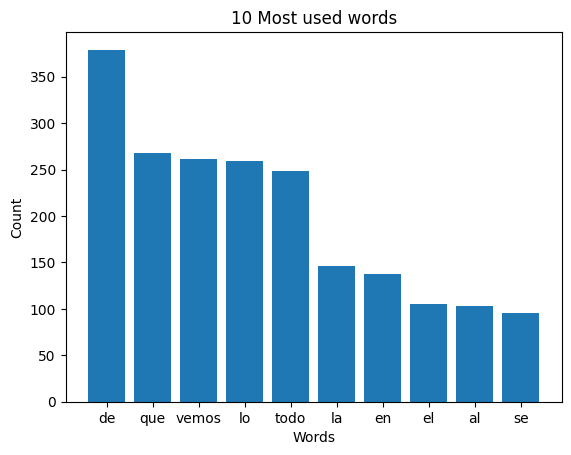

In [273]:
labels = [item[0] for item in ten_most_used]
values = [item[1] for item in ten_most_used]
plt.bar(labels,values)
plt.xlabel("Words")
plt.ylabel("Count")
plt.title("10 Most used words")

In [274]:
stop_words=['de', 'que', 'lo', 'la', 'en', 'el', 'al', 'se', 'los', 'del', 'nos', 'un', 'in', 'mi', 'con', 'por', 'sub', 'una', 'para', 'mas', 'ni', 'no']
new_dictionary = defaultdict(int)
for title in titles:
    new_dictionary=addWordsToDictionary(title, new_dictionary, stop_words)

In [275]:
TF = []
for title in titles:
    words = title.split()
    row = []
    for wordDict in new_dictionary:
        if wordDict in title:
            row.append(words.count(wordDict)/len(words))
        else:
            row.append(0)
    TF.append(row)
formatted_index=['Title'+ str(i) for i in range(len(titles))]
TF_columns = [word for word in new_dictionary]
TF_no_index = pd.DataFrame(TF,columns=TF_columns)
TF = pd.DataFrame(TF,columns=TF_columns, index=formatted_index)

In [276]:
TF

,urbilogo,bogota,dominguera,historias,bici,sibate,pedalea,su,pasado,today,replay,febrero,documentales,camilo,cura,guerrillero,hoy,martes,mayo,alparapensar,cine,vemos,cuchillo,palo,renate,costa,pepa,clip,mascara,carnaval,saludo,miguel,angel,lopez,todo,televidente,oscar,augusto,ferreira,nairo,quintana,ya,esta,viajando,francia,sillon,hip,hop,concurso,nacional,bandas,paipa,boyaca,desfile,completo,tour,originalidad,pedaleopor,ariel,molina,envia,escarabajos,frank,ramirez,icono,tv,colombia,preguntas,frecuentes,operador,video,puesto,gente,universal,gran,escuesta,colombiano,jaime,echavarria,acceso,directo,glosario,horario,familiar,mariana,pajon,llega,juegos,nacionales,jueves,viernes,noviembre,paranacionales,juan,pablo,castellanos,edificio,master,eduardo,coutinho,argentinos,toman,metro,rio,ver,magazin,retromoda,nuestros,deportistas,paulo,villar,sicario,jose,ramon,novoa,televidentes,francisco,casas,dbc,intro,cap,habito,salvando,planeta,palabra,mentiras,piadosas,capitulo,oro,paz,clara,joya,vimos,seis,programas,innovadores,edgar,melo,sabado,julio,mes,literatura,artpoetica,abril,junio,reso,animales,largo,nett,nuestras,escuelas,transforman,territorios,lunes,convocatoria,sobre,derechos,humanos,las,mujeres,violencia,basada,genero,anonimas,extraordinarias,claudia,delgado,estreno,temporada,puerto,papel,maite,hontele,ft,freaky,colectivo,jame,asi,sandra,ria,horribles,serie,pm,garzon,especial,ganador,india,catalina,mejor,produccion,periodistica,josefina,guante,parlante,carnavalito,cirugia,estetica,mpg,es,chevere,estar,equipo,aislados,fotografia,nace,orquesta,entrevista,manuela,vasquez,aldeportes,paseos,retro,reel,alcolombia,colom,bio,basuras,respuestas,vivir,juntos,familia,argentina,avila,padres,hijos,nueva,venecia,situacion,pesca,television,fue,nuestra,visita,fundacion,cardioinfantil,comegalletas,parte,pimienta,cayena,promo,oli,mpicos,metros,planos,puros,criollos,nuestro,canal,youtube,simultanea,...,vanidad,camacho,vivaldi,cantando,brasilia,yo,soy,buscas,infografia,adultos,mpeg,espejo,ritos,sus,impresiones,dagoberto,relajate,hay,mejores,formas,mostrar,pensar,pico,cha,gu,eva,infantiles,fin,raul,amortegui,telenovelas,perfil,oswaldo,aferra,liderato,mirar,tele,sismografo,casero,duberney,galvis,lotto,beliso,mu,oz,perdita,durango,educativa,territorio,bandola,marcador,gaviria,giro,paseo,debate,foros,postconflicto,tecnologias,jonathan,devia,jesus,chucho,bombillas,electricas,homejaje,sindy,ortiz,petrona,dan,opinion,anton,tiruriru,villancicos,tipicos,ltimo,boyita,solomonoff,cifuentes,biopics,nepentes,violentos,mecanico,trek,segafredo,rasos,conversatorio,rompiendo,fronteras,john,grandes,misterios,universo,morgan,freeman,sabados,domingos,ximena,liliana,familiaridad,us,open,guia,practica,criollo,payaso,deportivo,psy,rivas,presentador,fiel,vainilla,clases,carlo,alerta,kamarada,legal,agustin,agualongo,edu,duarte,comida,mama,cortaron,servicios,elvis,alejandro,diaz,gabriele,mirabassi,bocadillo,vele,promocion,zombie,brayan,cimarron,tatiana,forero,jornada,cardona,cursi,guapi,competencia,funeral,siniestro,pinilla,toda,arena,miranda,baile,filtro,carbon,castiblanco,versos,leandro,habanastation,ian,padron,neuronas,boxeador,lara,st,pabellon,triangulo,horarios,voz,capella,amores,encinenosvemos,mecanicas,acondicionado,vera,echevarria,patrimonio,revive,tirreno,adriatico,infamia,megachef,diente,brasilandia,favela,invadida,hacia,margarita,herrera,granada,villaneda,ysue,matias,corazones,ensangrentados,wojtyla,piensa,diferente,libera,ventana,andina,frontera,caminantes,jineth,baron,problemas,politico,doctor,krapula,lastime,caterine,acompa,atletas,viena,diana,arevalo,vogulys,isabella,rossellini,alzate,estan,nosotros,lancheros,stoltze,partir,mueve,trocha,montaje,religion,tapita,seguimos,hora,cubillos,manjar,blanco,tamborito,pez,hd,fabre,botero,isabel,cincuenta,rejuvenece,clasdestina,sanjines,victor,firmes,nn,soto,justicia,identidad,lentejas,ultra,poderosas
Title0,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000

In [277]:
categories = ['entretenimiento', 'deportes', 'pelicula y animacion', 'educacion']
df['descripcion'] = df['descripcion'].apply(lambda category: quitAccentsUnnecesarySpacesAndLower(category))
df['descripcion'] = df['descripcion'].apply(lambda category: category if category in categories else 'otros')
df['descripcion']
df_dummies = pd.get_dummies(df['descripcion'],dummy_na=True,drop_first=False)

In [ ]:
df_corr = pd.concat((TF_no_index,df_dummies), axis=1)
px.imshow(df_corr.corr())

KeyboardInterrupt: 

In [278]:
TF

,urbilogo,bogota,dominguera,historias,bici,sibate,pedalea,su,pasado,today,replay,febrero,documentales,camilo,cura,guerrillero,hoy,martes,mayo,alparapensar,cine,vemos,cuchillo,palo,renate,costa,pepa,clip,mascara,carnaval,saludo,miguel,angel,lopez,todo,televidente,oscar,augusto,ferreira,nairo,quintana,ya,esta,viajando,francia,sillon,hip,hop,concurso,nacional,bandas,paipa,boyaca,desfile,completo,tour,originalidad,pedaleopor,ariel,molina,envia,escarabajos,frank,ramirez,icono,tv,colombia,preguntas,frecuentes,operador,video,puesto,gente,universal,gran,escuesta,colombiano,jaime,echavarria,acceso,directo,glosario,horario,familiar,mariana,pajon,llega,juegos,nacionales,jueves,viernes,noviembre,paranacionales,juan,pablo,castellanos,edificio,master,eduardo,coutinho,argentinos,toman,metro,rio,ver,magazin,retromoda,nuestros,deportistas,paulo,villar,sicario,jose,ramon,novoa,televidentes,francisco,casas,dbc,intro,cap,habito,salvando,planeta,palabra,mentiras,piadosas,capitulo,oro,paz,clara,joya,vimos,seis,programas,innovadores,edgar,melo,sabado,julio,mes,literatura,artpoetica,abril,junio,reso,animales,largo,nett,nuestras,escuelas,transforman,territorios,lunes,convocatoria,sobre,derechos,humanos,las,mujeres,violencia,basada,genero,anonimas,extraordinarias,claudia,delgado,estreno,temporada,puerto,papel,maite,hontele,ft,freaky,colectivo,jame,asi,sandra,ria,horribles,serie,pm,garzon,especial,ganador,india,catalina,mejor,produccion,periodistica,josefina,guante,parlante,carnavalito,cirugia,estetica,mpg,es,chevere,estar,equipo,aislados,fotografia,nace,orquesta,entrevista,manuela,vasquez,aldeportes,paseos,retro,reel,alcolombia,colom,bio,basuras,respuestas,vivir,juntos,familia,argentina,avila,padres,hijos,nueva,venecia,situacion,pesca,television,fue,nuestra,visita,fundacion,cardioinfantil,comegalletas,parte,pimienta,cayena,promo,oli,mpicos,metros,planos,puros,criollos,nuestro,canal,youtube,simultanea,...,vanidad,camacho,vivaldi,cantando,brasilia,yo,soy,buscas,infografia,adultos,mpeg,espejo,ritos,sus,impresiones,dagoberto,relajate,hay,mejores,formas,mostrar,pensar,pico,cha,gu,eva,infantiles,fin,raul,amortegui,telenovelas,perfil,oswaldo,aferra,liderato,mirar,tele,sismografo,casero,duberney,galvis,lotto,beliso,mu,oz,perdita,durango,educativa,territorio,bandola,marcador,gaviria,giro,paseo,debate,foros,postconflicto,tecnologias,jonathan,devia,jesus,chucho,bombillas,electricas,homejaje,sindy,ortiz,petrona,dan,opinion,anton,tiruriru,villancicos,tipicos,ltimo,boyita,solomonoff,cifuentes,biopics,nepentes,violentos,mecanico,trek,segafredo,rasos,conversatorio,rompiendo,fronteras,john,grandes,misterios,universo,morgan,freeman,sabados,domingos,ximena,liliana,familiaridad,us,open,guia,practica,criollo,payaso,deportivo,psy,rivas,presentador,fiel,vainilla,clases,carlo,alerta,kamarada,legal,agustin,agualongo,edu,duarte,comida,mama,cortaron,servicios,elvis,alejandro,diaz,gabriele,mirabassi,bocadillo,vele,promocion,zombie,brayan,cimarron,tatiana,forero,jornada,cardona,cursi,guapi,competencia,funeral,siniestro,pinilla,toda,arena,miranda,baile,filtro,carbon,castiblanco,versos,leandro,habanastation,ian,padron,neuronas,boxeador,lara,st,pabellon,triangulo,horarios,voz,capella,amores,encinenosvemos,mecanicas,acondicionado,vera,echevarria,patrimonio,revive,tirreno,adriatico,infamia,megachef,diente,brasilandia,favela,invadida,hacia,margarita,herrera,granada,villaneda,ysue,matias,corazones,ensangrentados,wojtyla,piensa,diferente,libera,ventana,andina,frontera,caminantes,jineth,baron,problemas,politico,doctor,krapula,lastime,caterine,acompa,atletas,viena,diana,arevalo,vogulys,isabella,rossellini,alzate,estan,nosotros,lancheros,stoltze,partir,mueve,trocha,montaje,religion,tapita,seguimos,hora,cubillos,manjar,blanco,tamborito,pez,hd,fabre,botero,isabel,cincuenta,rejuvenece,clasdestina,sanjines,victor,firmes,nn,soto,justicia,identidad,lentejas,ultra,poderosas
Title0,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000

In [279]:
title_counts = []

for word in new_dictionary:
    count = 0
    for title in titles:
        if word in title:
            count += 1
    title_counts.append(count)


In [280]:
IDF = []
for number in title_counts:
    IDF.append(np.log10((len(titles)+1)/(number+1)))

In [281]:
new_df = TF_no_index * IDF
new_df

,urbilogo,bogota,dominguera,historias,bici,sibate,pedalea,su,pasado,today,replay,febrero,documentales,camilo,cura,guerrillero,hoy,martes,mayo,alparapensar,cine,vemos,cuchillo,palo,renate,costa,pepa,clip,mascara,carnaval,saludo,miguel,angel,lopez,todo,televidente,oscar,augusto,ferreira,nairo,quintana,ya,esta,viajando,francia,sillon,hip,hop,concurso,nacional,bandas,paipa,boyaca,desfile,completo,tour,originalidad,pedaleopor,ariel,molina,envia,escarabajos,frank,ramirez,icono,tv,colombia,preguntas,frecuentes,operador,video,puesto,gente,universal,gran,escuesta,colombiano,jaime,echavarria,acceso,directo,glosario,horario,familiar,mariana,pajon,llega,juegos,nacionales,jueves,viernes,noviembre,paranacionales,juan,pablo,castellanos,edificio,master,eduardo,coutinho,argentinos,toman,metro,rio,ver,magazin,retromoda,nuestros,deportistas,paulo,villar,sicario,jose,ramon,novoa,televidentes,francisco,casas,dbc,intro,cap,habito,salvando,planeta,palabra,mentiras,piadosas,capitulo,oro,paz,clara,joya,vimos,seis,programas,innovadores,edgar,melo,sabado,julio,mes,literatura,artpoetica,abril,junio,reso,animales,largo,nett,nuestras,escuelas,transforman,territorios,lunes,convocatoria,sobre,derechos,humanos,las,mujeres,violencia,basada,genero,anonimas,extraordinarias,claudia,delgado,estreno,temporada,puerto,papel,maite,hontele,ft,freaky,colectivo,jame,asi,sandra,ria,horribles,serie,pm,garzon,especial,ganador,india,catalina,mejor,produccion,periodistica,josefina,guante,parlante,carnavalito,cirugia,estetica,mpg,es,chevere,estar,equipo,aislados,fotografia,nace,orquesta,entrevista,manuela,vasquez,aldeportes,paseos,retro,reel,alcolombia,colom,bio,basuras,respuestas,vivir,juntos,familia,argentina,avila,padres,hijos,nueva,venecia,situacion,pesca,television,fue,nuestra,visita,fundacion,cardioinfantil,comegalletas,parte,pimienta,cayena,promo,oli,mpicos,metros,planos,puros,criollos,nuestro,canal,youtube,simultanea,...,vanidad,camacho,vivaldi,cantando,brasilia,yo,soy,buscas,infografia,adultos,mpeg,espejo,ritos,sus,impresiones,dagoberto,relajate,hay,mejores,formas,mostrar,pensar,pico,cha,gu,eva,infantiles,fin,raul,amortegui,telenovelas,perfil,oswaldo,aferra,liderato,mirar,tele,sismografo,casero,duberney,galvis,lotto,beliso,mu,oz,perdita,durango,educativa,territorio,bandola,marcador,gaviria,giro,paseo,debate,foros,postconflicto,tecnologias,jonathan,devia,jesus,chucho,bombillas,electricas,homejaje,sindy,ortiz,petrona,dan,opinion,anton,tiruriru,villancicos,tipicos,ltimo,boyita,solomonoff,cifuentes,biopics,nepentes,violentos,mecanico,trek,segafredo,rasos,conversatorio,rompiendo,fronteras,john,grandes,misterios,universo,morgan,freeman,sabados,domingos,ximena,liliana,familiaridad,us,open,guia,practica,criollo,payaso,deportivo,psy,rivas,presentador,fiel,vainilla,clases,carlo,alerta,kamarada,legal,agustin,agualongo,edu,duarte,comida,mama,cortaron,servicios,elvis,alejandro,diaz,gabriele,mirabassi,bocadillo,vele,promocion,zombie,brayan,cimarron,tatiana,forero,jornada,cardona,cursi,guapi,competencia,funeral,siniestro,pinilla,toda,arena,miranda,baile,filtro,carbon,castiblanco,versos,leandro,habanastation,ian,padron,neuronas,boxeador,lara,st,pabellon,triangulo,horarios,voz,capella,amores,encinenosvemos,mecanicas,acondicionado,vera,echevarria,patrimonio,revive,tirreno,adriatico,infamia,megachef,diente,brasilandia,favela,invadida,hacia,margarita,herrera,granada,villaneda,ysue,matias,corazones,ensangrentados,wojtyla,piensa,diferente,libera,ventana,andina,frontera,caminantes,jineth,baron,problemas,politico,doctor,krapula,lastime,caterine,acompa,atletas,viena,diana,arevalo,vogulys,isabella,rossellini,alzate,estan,nosotros,lancheros,stoltze,partir,mueve,trocha,montaje,religion,tapita,seguimos,hora,cubillos,manjar,blanco,tamborito,pez,hd,fabre,botero,isabel,cincuenta,rejuvenece,clasdestina,sanjines,victor,firmes,nn,soto,justicia,identidad,lentejas,ultra,poderosas
0,0.799458,0.718445,0.899801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [282]:
df_to_models = pd.concat((new_df,df['descripcion']), axis=1)
df_to_models

,urbilogo,bogota,dominguera,historias,bici,sibate,pedalea,su,pasado,today,replay,febrero,documentales,camilo,cura,guerrillero,hoy,martes,mayo,alparapensar,cine,vemos,cuchillo,palo,renate,costa,pepa,clip,mascara,carnaval,saludo,miguel,angel,lopez,todo,televidente,oscar,augusto,ferreira,nairo,quintana,ya,esta,viajando,francia,sillon,hip,hop,concurso,nacional,bandas,paipa,boyaca,desfile,completo,tour,originalidad,pedaleopor,ariel,molina,envia,escarabajos,frank,ramirez,icono,tv,colombia,preguntas,frecuentes,operador,video,puesto,gente,universal,gran,escuesta,colombiano,jaime,echavarria,acceso,directo,glosario,horario,familiar,mariana,pajon,llega,juegos,nacionales,jueves,viernes,noviembre,paranacionales,juan,pablo,castellanos,edificio,master,eduardo,coutinho,argentinos,toman,metro,rio,ver,magazin,retromoda,nuestros,deportistas,paulo,villar,sicario,jose,ramon,novoa,televidentes,francisco,casas,dbc,intro,cap,habito,salvando,planeta,palabra,mentiras,piadosas,capitulo,oro,paz,clara,joya,vimos,seis,programas,innovadores,edgar,melo,sabado,julio,mes,literatura,artpoetica,abril,junio,reso,animales,largo,nett,nuestras,escuelas,transforman,territorios,lunes,convocatoria,sobre,derechos,humanos,las,mujeres,violencia,basada,genero,anonimas,extraordinarias,claudia,delgado,estreno,temporada,puerto,papel,maite,hontele,ft,freaky,colectivo,jame,asi,sandra,ria,horribles,serie,pm,garzon,especial,ganador,india,catalina,mejor,produccion,periodistica,josefina,guante,parlante,carnavalito,cirugia,estetica,mpg,es,chevere,estar,equipo,aislados,fotografia,nace,orquesta,entrevista,manuela,vasquez,aldeportes,paseos,retro,reel,alcolombia,colom,bio,basuras,respuestas,vivir,juntos,familia,argentina,avila,padres,hijos,nueva,venecia,situacion,pesca,television,fue,nuestra,visita,fundacion,cardioinfantil,comegalletas,parte,pimienta,cayena,promo,oli,mpicos,metros,planos,puros,criollos,nuestro,canal,youtube,simultanea,...,camacho,vivaldi,cantando,brasilia,yo,soy,buscas,infografia,adultos,mpeg,espejo,ritos,sus,impresiones,dagoberto,relajate,hay,mejores,formas,mostrar,pensar,pico,cha,gu,eva,infantiles,fin,raul,amortegui,telenovelas,perfil,oswaldo,aferra,liderato,mirar,tele,sismografo,casero,duberney,galvis,lotto,beliso,mu,oz,perdita,durango,educativa,territorio,bandola,marcador,gaviria,giro,paseo,debate,foros,postconflicto,tecnologias,jonathan,devia,jesus,chucho,bombillas,electricas,homejaje,sindy,ortiz,petrona,dan,opinion,anton,tiruriru,villancicos,tipicos,ltimo,boyita,solomonoff,cifuentes,biopics,nepentes,violentos,mecanico,trek,segafredo,rasos,conversatorio,rompiendo,fronteras,john,grandes,misterios,universo,morgan,freeman,sabados,domingos,ximena,liliana,familiaridad,us,open,guia,practica,criollo,payaso,deportivo,psy,rivas,presentador,fiel,vainilla,clases,carlo,alerta,kamarada,legal,agustin,agualongo,edu,duarte,comida,mama,cortaron,servicios,elvis,alejandro,diaz,gabriele,mirabassi,bocadillo,vele,promocion,zombie,brayan,cimarron,tatiana,forero,jornada,cardona,cursi,guapi,competencia,funeral,siniestro,pinilla,toda,arena,miranda,baile,filtro,carbon,castiblanco,versos,leandro,habanastation,ian,padron,neuronas,boxeador,lara,st,pabellon,triangulo,horarios,voz,capella,amores,encinenosvemos,mecanicas,acondicionado,vera,echevarria,patrimonio,revive,tirreno,adriatico,infamia,megachef,diente,brasilandia,favela,invadida,hacia,margarita,herrera,granada,villaneda,ysue,matias,corazones,ensangrentados,wojtyla,piensa,diferente,libera,ventana,andina,frontera,caminantes,jineth,baron,problemas,politico,doctor,krapula,lastime,caterine,acompa,atletas,viena,diana,arevalo,vogulys,isabella,rossellini,alzate,estan,nosotros,lancheros,stoltze,partir,mueve,trocha,montaje,religion,tapita,seguimos,hora,cubillos,manjar,blanco,tamborito,pez,hd,fabre,botero,isabel,cincuenta,rejuvenece,clasdestina,sanjines,victor,firmes,nn,soto,justicia,identidad,lentejas,ultra,poderosas,descripcion
0,0.799458,0.718445,0.899801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [283]:
df_train, df_test = train_test_split(df_to_models, test_size= 0.2)
df_train_x = df_train.drop('descripcion', axis=1)
df_train_y = df_train[['descripcion']]
df_test_x = df_test.drop('descripcion', axis=1)
df_test_y = df_test[['descripcion']]
features = [word for word in new_dictionary]

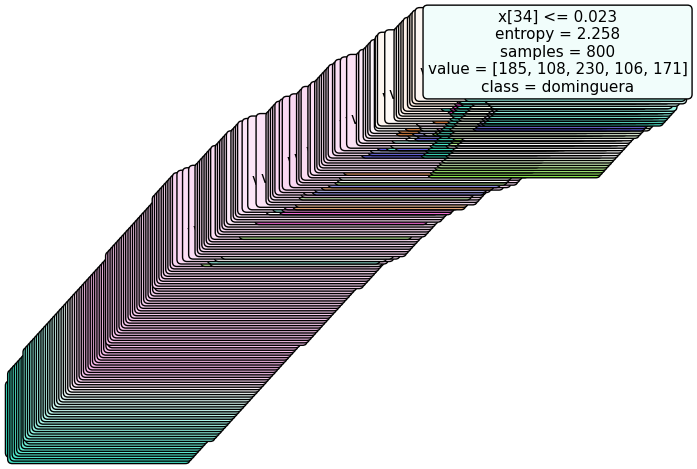

In [284]:
classifier = tree.DecisionTreeClassifier(random_state=0 ,criterion='entropy')
classifier.fit(df_train_x, df_train_y)
print_tree(classifier, features)

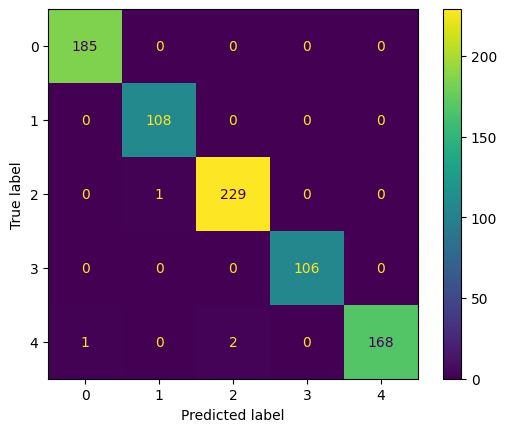

In [293]:
print_confusion_matrix(df_train_x, df_train_y, classifier)

In [299]:
gbm = GradientBoostingClassifier(n_estimators=3,
                                 learning_rate=1.0,max_depth=3, random_state=0)
gbm.fit(df_train_x, df_train_y)
tree = gbm.estimators_[0][0]
dot_data = export_graphviz(tree,
                           feature_names=features,  
                           filled=True,  
                           max_depth=3, 
                           impurity=False, 
                           proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

c:\Users\Carlos Manuel Puerta\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH